# Lab 3 - Prior and Posterior predictive distributions

In [17]:
from cmdstanpy import CmdStanModel
import arviz as az 
import numpy as np

### Modeling prior predictive distribution

INFO:cmdstanpy:compiling stan file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model.stan to exe file /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model
INFO:cmdstanpy:compiled model executable: /root/.vscode-server/bin/ee2b180d582a7f601fa6ecfdad8d9fd269ab1884/Data-Analytics/Lab3/prior_model
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

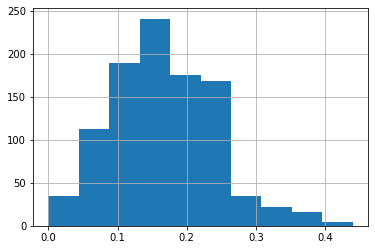

In [18]:
priori_quant = CmdStanModel(stan_file='prior_model.stan')
samples = priori_quant.sample(fixed_param=True, iter_sampling=1000)
ratio = samples.draws_pd()["y"] / samples.draws_pd()["N"]
ratio.hist()

In [19]:
ratio.mean()

0.16472000000000003

In order to receive consistent ratio with prior knowledge it is needed to decrease interval for beta random number generator. For initial values of alpha nad beta (8 and 44) this ratio was equal to about 0.15 and it is increasing when we narrow down the interval.

### Modeling posterior and posterior predictive distribution

In [20]:
posterior_quant = CmdStanModel(stan_file='posterior_model.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [21]:
N = 50
y = 7
samples = posterior_quant.sample(data={'N':N, 'y':y})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


<AxesSubplot:>

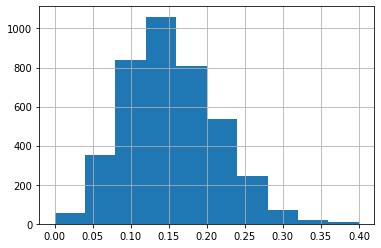

In [22]:
ratio = samples.draws_pd()["y_pred"] / N
ratio.hist()

In [23]:
ratio_pred_mean = ratio.mean()
ratio_pred_interval = az.hdi(np.array(ratio))

p_ratio =  samples.draws_pd()["p"]
p_ratio_mean = p_ratio.mean()
p_ratio_interval = az.hdi(np.array(p_ratio))

print(f'Predicted ratio:\nexpected value: {ratio_pred_mean}\n94% density interval: {ratio_pred_interval}')
print(f'Parameter p:\nexpected value: {p_ratio_mean}\n94% density interval: {p_ratio_interval}')

Predicted ratio:
expected value: 0.14364500000000002
94% density interval: [0.02 0.24]
Parameter p:
expected value: 0.1449975544
94% density interval: [0.0830363 0.212898 ]


In [24]:
prob = (np.array(ratio) < 0.2).sum() / np.array(ratio).shape[0]
prob

0.778

The probability that ratio is lower than the average probability from traditional vaccines is about 0.78, so it is rather more probable that new vaccine doesn't cause allergic reaction in comparison to certain vaccine.